<a href="https://colab.research.google.com/github/SnrPep/Mos/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.datasets import fetch_20newsgroups

categories = ['rec.sport.baseball', 'sci.space', 'comp.graphics', 'talk.politics.misc']
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

texts = data.data
labels = data.target
label_names = data.target_names

print(f"Всего документов: {len(texts)}")
print(f"Категории: {label_names}")



Всего документов: 3729
Категории: ['comp.graphics', 'rec.sport.baseball', 'sci.space', 'talk.politics.misc']


In [10]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

texts_clean = [preprocess(text) for text in texts]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


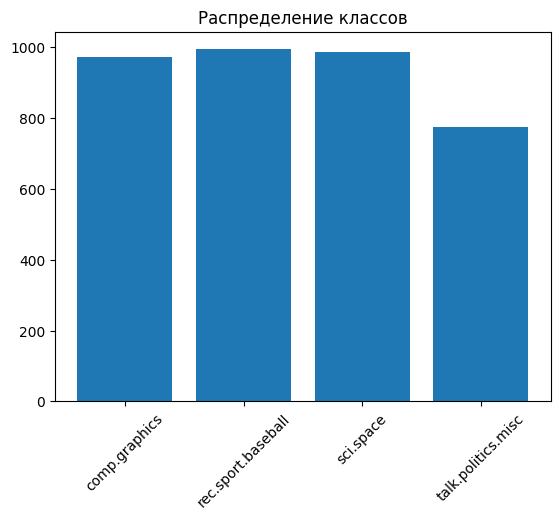

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

label_counts = Counter(labels)
plt.bar(label_names, [label_counts[i] for i in range(len(label_names))])
plt.title("Распределение классов")
plt.xticks(rotation=45)
plt.show()


Кластреры выглядят достаточно кучно, самый большой - синий

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(texts_clean)


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


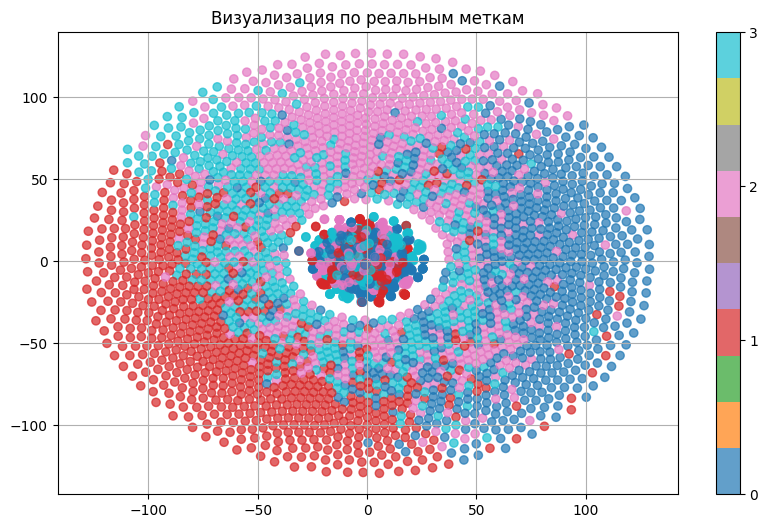

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.title("Визуализация по реальным меткам")
plt.colorbar(scatter, ticks=range(len(label_names)))
plt.grid(True)
plt.show()


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, labels, test_size=0.3, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train: {len(y_train)}, Validation: {len(y_val)}, Test: {len(y_test)}")


Train: 2610, Validation: 559, Test: 560


In [15]:
import pandas as pd

df = pd.DataFrame({'text': texts, 'label': labels})
df['label_name'] = df['label'].apply(lambda x: label_names[x])

print("Общее количество документов:", len(df))
print("Количество классов:", df['label_name'].nunique())
print("\nРаспределение документов по категориям:")
print(df['label_name'].value_counts())


Общее количество документов: 3729
Количество классов: 4

Распределение документов по категориям:
label_name
rec.sport.baseball    994
sci.space             987
comp.graphics         973
talk.politics.misc    775
Name: count, dtype: int64



Средняя длина текста (в словах): 193.7004558862966
Медианная длина текста: 78.0


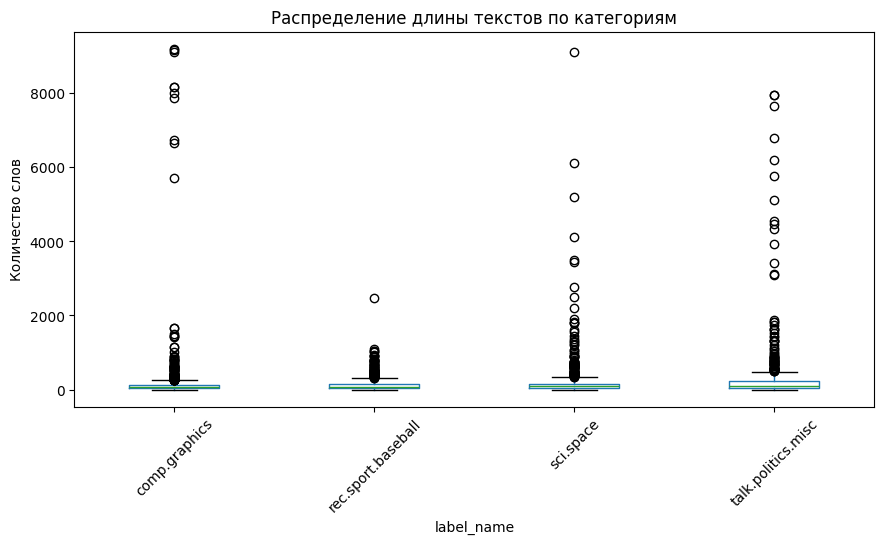

In [16]:
df['text_len'] = df['text'].apply(lambda x: len(x.split()))
print("\nСредняя длина текста (в словах):", df['text_len'].mean())
print("Медианная длина текста:", df['text_len'].median())

df.boxplot(column='text_len', by='label_name', figsize=(10, 5), grid=False)
plt.title("Распределение длины текстов по категориям")
plt.suptitle("")
plt.xticks(rotation=45)
plt.ylabel("Количество слов")
plt.show()


In [17]:
from collections import Counter

all_tokens = " ".join(texts_clean).split()
common_words = Counter(all_tokens).most_common(20)

print("\n20 самых частых слов в корпусе:")
for word, freq in common_words:
    print(f"{word}: {freq}")



20 самых частых слов в корпусе:
would: 2373
one: 1798
space: 1444
like: 1368
think: 1357
also: 1304
people: 1289
get: 1236
know: 1217
image: 1201
time: 1128
edu: 1077
well: 994
could: 945
first: 910
good: 882
graphics: 873
much: 855
year: 855
use: 849


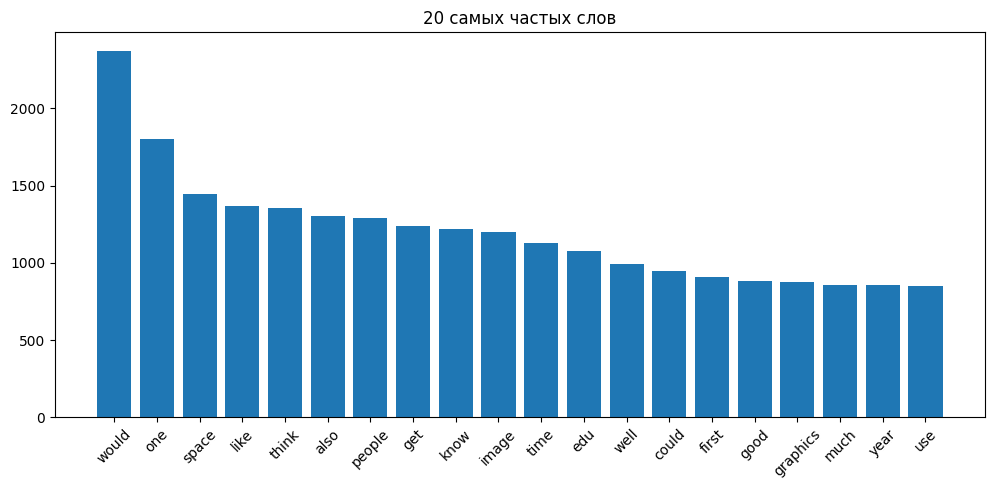

In [18]:
words, freqs = zip(*common_words)
plt.figure(figsize=(12, 5))
plt.bar(words, freqs)
plt.title("20 самых частых слов")
plt.xticks(rotation=45)
plt.show()


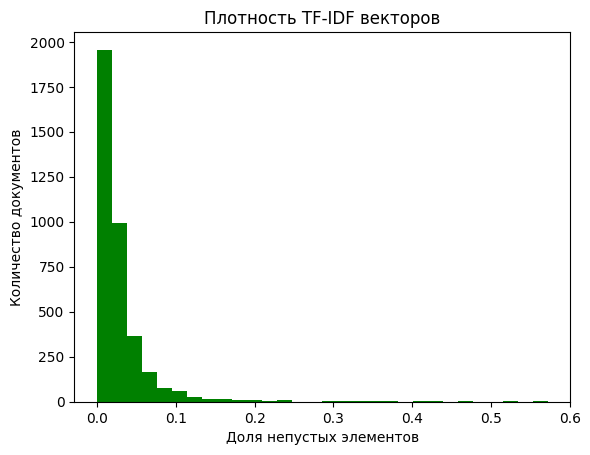

In [19]:
import numpy as np

density = (X > 0).sum(axis=1) / X.shape[1]
plt.hist(np.array(density).flatten(), bins=30, color='green')
plt.title("Плотность TF-IDF векторов")
plt.xlabel("Доля непустых элементов")
plt.ylabel("Количество документов")
plt.show()
